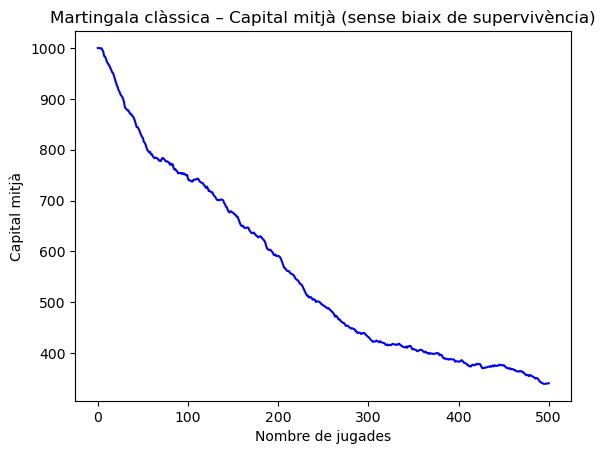

Percentatge de ruïna: 90.2 %
Capital mitjà final: 340.79


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Paràmetres globals
# -------------------------------
B0 = 1000        # capital inicial
n = 500          # nombre màxim de jugades
N = 1000         # nombre de simulacions
b0 = 10          # aposta inicial

p_guanyar = 18 / 37
p_perdre = 19 / 37

# -------------------------------
# Simulació rigorosa
# -------------------------------
trajectories = np.zeros((N, n + 1))
capitals_finals = []
ruina = []

for sim in range(N):
    B = B0
    k = 0  # nombre de pèrdues consecutives
    trajectories[sim, 0] = B

    for i in range(1, n + 1):
        if B <= 0:
            trajectories[sim, i] = 0
            continue

        # Definició de l'aposta (martingala)
        bi = (2 ** k) * b0

        if bi > B:
            B = 0
            trajectories[sim, i] = 0
            continue

        # Resultat aleatori
        Xi = np.random.choice([1, -1], p=[p_guanyar, p_perdre])
        B = B + bi * Xi
        trajectories[sim, i] = B

        # Actualització del comptador de pèrdues
        if Xi == -1:
            k += 1
        else:
            k = 0

    capitals_finals.append(B)
    ruina.append(1 if B <= 0 else 0)

# -------------------------------
# Mitjana rigorosa
# -------------------------------
capital_mitja_correcte = np.mean(trajectories, axis=0)

plt.figure()
plt.plot(capital_mitja_correcte, color='blue')
plt.xlabel("Nombre de jugades")
plt.ylabel("Capital mitjà")
plt.title("Martingala clàssica – Capital mitjà (sense biaix de supervivència)")
plt.show()

# -------------------------------
# Resultats numèrics
# -------------------------------
print("Percentatge de ruïna:", 100 * sum(ruina) / N, "%")
print("Capital mitjà final:", np.mean(capitals_finals))
